In [1]:
from dataset_loader import H36M

import matplotlib.pyplot as plt 
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
h36m = H36M(num_images=10000, mode='train')

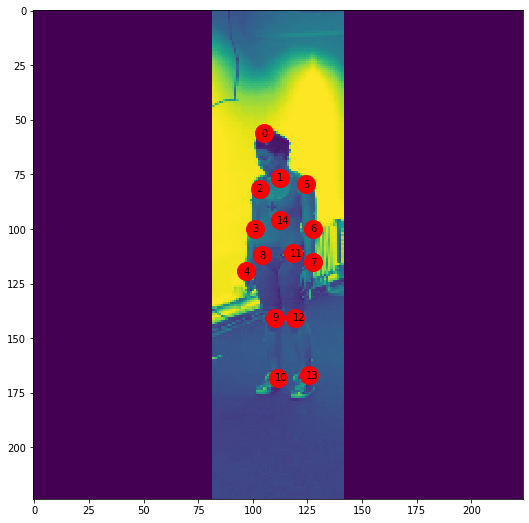

In [3]:
# 1237 - pretty nice ex
image, annot_2d = h36m[1237]

fig,ax = plt.subplots(1, figsize=(9,9))
plt.imshow(image.permute(1,2,0).mean(dim=2))

plt.plot(annot_2d[:,0], annot_2d[:,1], 'ro', markersize=18)
for i, joint in enumerate(annot_2d):
    
    plt.annotate(i, (float(joint[0]), float(joint[1])), 
                 xytext=(-3,-3), textcoords='offset points')


In [7]:
from dataset_loader import MPII
import torch as th

In [8]:
mpii = MPII(mode='val')

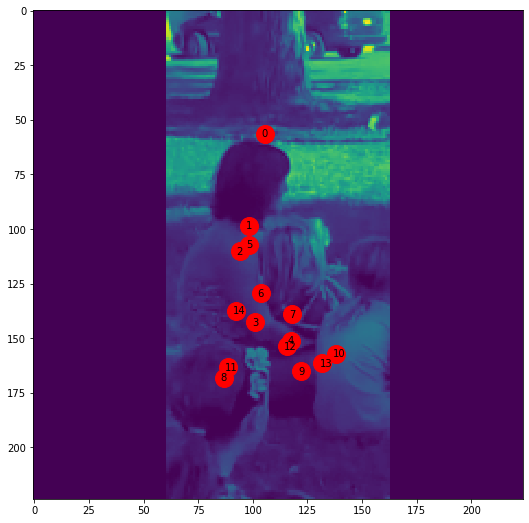

In [9]:
image, annot_2d, joints_valid = mpii[990]

joints_names = th.arange(15)[joints_valid]

fig,ax = plt.subplots(1, figsize=(9,9))
ax.imshow(image.permute(1,2,0).mean(dim=2))

ax.plot(annot_2d[:,0], annot_2d[:,1], 'ro', markersize=18)
for i, joint in enumerate(annot_2d):
    ax.annotate(str(int(joints_names[i])), (float(joint[0]), float(joint[1])), 
                xytext=(-3,-3), textcoords='offset points')


In [22]:
from dataset_loader import MPII, H36M

In [23]:
from torch.utils.data import DataLoader

mpii = MPII()
data_loader = DataLoader(mpii, batch_size=5, shuffle=False)

In [24]:
for x in data_loader:
    print(x)
    break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 

In [29]:
x[0].shape, x[1].shape, x[2].shape

(torch.Size([5, 3, 224, 224]), torch.Size([5, 15, 2]), torch.Size([5, 15]))

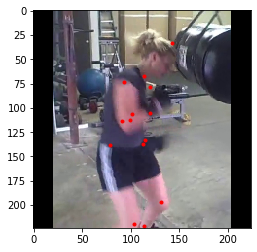

In [33]:
idx = 2
plt.imshow(x[0][idx].permute(1,2,0))
joints = x[1][idx][x[2][idx]]
plt.plot(joints[:,0], joints[:,1], 'r.')